# Case Study on Probability 

# python libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# dataset to the python environment

In [3]:
data1=pd.read_csv('mushrooms.csv')
data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data1.shape

(8124, 23)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# checking null values

In [8]:
data1.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
data1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Preprocessing 

In [11]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in data1.columns:
   data1[column]=le.fit_transform(data1[column])

In [12]:
data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


column values are converted to ordinal

In [13]:
data1['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [14]:
data1=data1.drop(['veil-type'],axis=1)

In [15]:
x=data1.drop(['class'],axis=1)
y=data1['class']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

In [17]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,...,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03
mean,-5.423612e-15,4.217659e-17,4.423065e-15,-1.797258e-14,-3.590486e-15,-2.478055e-14,8.422977e-15,8.636999e-15,1.302651e-14,-6.287000e-15,...,5.016557e-15,1.023102e-15,1.695586e-14,-1.065692e-14,2.558990e-14,2.290006e-16,-2.067585e-14,5.804445e-14,-6.046588e-15,9.402621e-15
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,...,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-2.087047e+00,-1.486157e+00,-1.769549e+00,-8.432296e-01,-1.970316e+00,-6.138869e+00,-4.388636e-01,-6.690383e-01,-1.358896e+00,-1.144806e+00,...,-2.534652e+00,-2.372490e+00,-3.058611e+00,-3.038361e+00,-8.100146e+00,-3.945519e+00,-1.272216e+00,-1.509643e+00,-2.910546e+00,-8.771691e-01
25%,-8.403434e-01,-1.486157e+00,-5.910746e-01,-8.432296e-01,-1.019565e+00,1.628965e-01,-4.388636e-01,-6.690383e-01,-7.939470e-01,-1.144806e+00,...,-9.254372e-01,-8.930529e-01,9.657680e-02,1.076554e-01,1.420366e-01,-2.561317e-01,-1.272216e+00,-6.701949e-01,-5.143892e-01,-8.771691e-01
50%,-2.169915e-01,1.401279e-01,-1.982498e-01,-8.432296e-01,4.065620e-01,1.628965e-01,-4.388636e-01,-6.690383e-01,5.347685e-02,8.735106e-01,...,6.837777e-01,5.863847e-01,6.224414e-01,6.319914e-01,1.420366e-01,-2.561317e-01,-1.620674e-01,-2.504706e-01,2.843298e-01,-2.957297e-01
75%,1.029712e+00,9.532704e-01,1.373049e+00,1.185917e+00,4.065620e-01,1.628965e-01,-4.388636e-01,1.494683e+00,6.184261e-01,8.735106e-01,...,6.837777e-01,5.863847e-01,6.224414e-01,6.319914e-01,1.420366e-01,-2.561317e-01,9.480809e-01,1.428426e+00,2.843298e-01,2.857098e-01
max,1.029712e+00,9.532704e-01,1.765874e+00,1.185917e+00,1.832689e+00,1.628965e-01,2.278612e+00,1.494683e+00,1.748325e+00,8.735106e-01,...,2.292993e+00,2.065822e+00,1.148306e+00,1.156327e+00,4.263128e+00,3.433255e+00,9.480809e-01,1.848151e+00,1.083049e+00,2.611468e+00


In [18]:

from sklearn.preprocessing import Normalizer
norm=Normalizer()
x=norm.fit_transform(x)
x=pd.DataFrame(x)

In [19]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.244678,0.033297,-0.047108,0.281795,0.209564,0.038707,-0.104282,0.355163,-0.054414,-0.272026,...,0.162478,0.139335,0.147903,0.150172,0.033750,-0.060861,0.225281,-0.159250,-0.122228,0.482371
1,0.252143,0.034313,0.432405,0.290392,-0.482466,0.039888,-0.107463,-0.163826,-0.056074,-0.280325,...,0.167435,0.143586,0.152416,0.154754,0.034780,-0.062718,0.232154,-0.061332,-0.321537,-0.072415
2,-0.525568,0.035288,0.345766,0.298642,-0.137040,0.041021,-0.110516,-0.168480,0.013467,-0.288289,...,0.172191,0.147665,0.156745,0.159150,0.035768,-0.064500,0.238749,-0.063074,-0.330672,0.218369
3,0.228002,0.211076,0.304025,0.262589,0.195281,0.036069,-0.097175,0.330957,0.011841,-0.253487,...,0.151404,0.129839,0.137823,0.139938,0.031450,-0.056714,0.209927,-0.148397,-0.113898,0.449495
4,0.210695,0.028672,-0.120943,-0.172538,0.083189,0.033331,0.466239,-0.136895,-0.046856,0.178734,...,0.139911,0.119983,0.127361,0.129315,0.029063,-0.052408,-0.260315,-0.051250,-0.595542,-0.060511


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
x_train.shape

(6093, 21)

In [22]:
y_train.shape

(6093,)

In [23]:
x_test.shape

(2031, 21)

In [24]:
y_test.shape

(2031,)

In [25]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [27]:
print("Logistic regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic regression Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1040
           1       0.95      0.94      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [28]:
 confusion_matrix(y_test, y_pred_lr)

array([[990,  50],
       [ 58, 933]], dtype=int64)

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred_kn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_kn)
    acc_values.append(acc)

In [30]:
acc_values

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999015263417036,
 0.999015263417036,
 0.999015263417036]

Text(0, 0.5, 'accuracy')

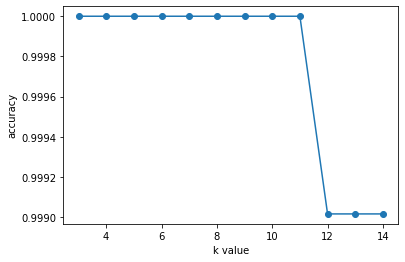

In [31]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [32]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred_kn=classifier.predict(x_test)

In [33]:
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_kn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [34]:
confusion_matrix(y_test, y_pred_kn)

array([[1040,    0],
       [   0,  991]], dtype=int64)

# SVM

In [35]:
from sklearn.svm import SVC
svm = SVC(random_state=42,kernel='linear')
svm.fit(x_train, y_train)
y_pred_svm=svm.predict(x_test)

In [36]:
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1040
           1       0.95      0.97      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [37]:
confusion_matrix(y_test, y_pred_svm)

array([[994,  46],
       [ 33, 958]], dtype=int64)

# DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)

In [39]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [40]:
confusion_matrix(y_test,y_pred_dt)

array([[1037,    3],
       [   2,  989]], dtype=int64)

# RANDOM FOREST

In [41]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)

In [42]:
print("Random forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [43]:
confusion_matrix(y_test,y_pred_rf)

array([[1040,    0],
       [   0,  991]], dtype=int64)

# Naive Bayes Classification

In [44]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred_Gu=classifier.predict(x_test)
y_pred_Gu

array([0, 1, 1, ..., 0, 0, 1])

In [45]:
confusion_matrix(y_test,y_pred_Gu)

array([[985,  55],
       [ 71, 920]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred_Gu)

0.9379615952732644

# RESULT

From the confusion matrix,our train and test data is balanced.Most of the classification methods hit 100% accuracy with this dataset.From the methods,KNN and Random forest are the best models compared to other models. is there any misclassification in the case of KNN and Random forest.They have also 100% accuracy.

# Attribute Information

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y

• bruises: bruises=t, no=f 

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s 

• gill-attachment: attached=a, descending=d, free=f, notched=n 

• gill-spacing: close=c, crowded=w, distant=d 

• gill-size: broad=b, narrow=n 

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 

• stalk-shape: enlarging=e, tapering=t 

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 

• veil-type: partial=p, universal=u 

• veil-colour: brown=n, orange=o, white=w, yellow=y 

• ring-number: none=n, one=o, two=t 

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z 

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y 

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y 

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d 